In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import os
import json
import numpy as np
from skimage import feature
from matplotlib import pyplot as plt

In [ ]:
#load the image
image_path = '/content/drive/MyDrive/Colab Notebooks/DATA engineering /w8/raw data/fruits.jpg'
image = cv2.imread(image_path)

(np.float64(-0.5), np.float64(639.5), np.float64(424.5), np.float64(-0.5))

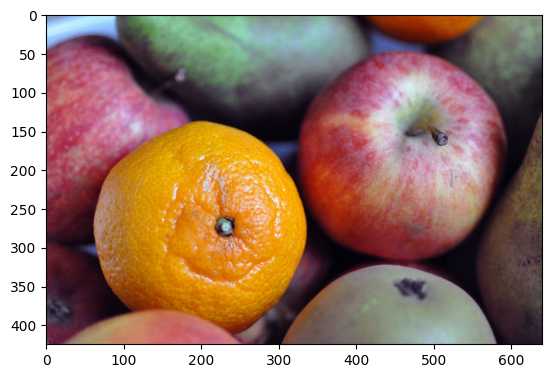

In [ ]:
#convert the image from BGR to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#display the image using matplotlib
plt.imshow(image_rgb)
plt.axis()
plt.axis()

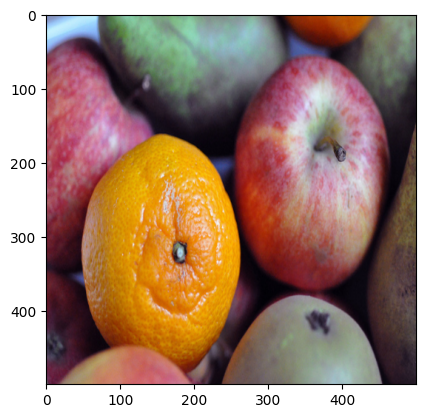

In [ ]:
#resize the image to 500x500 pix
resized_image = cv2.resize(image_rgb, (500,500))

#save the preprocessed image
cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/DATA engineering /w8/processed files/resized_image.jpg', resized_image)
#display the resized image using matplotlib
plt.imshow(resized_image)
plt.axis()
plt.show()

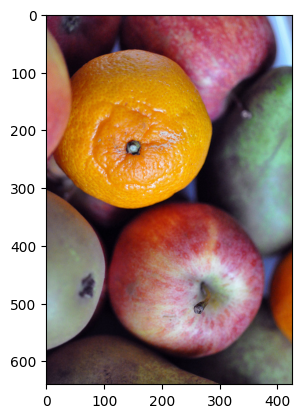

In [ ]:
#rotate the image (90 deg)
rotated_image_90 = cv2.rotate(image_rgb, cv2.ROTATE_90_CLOCKWISE)
#save the roatated image
cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/DATA engineering /w8/processed files/rotated_image_90.jpg', rotated_image_90)
#display the rotated image
plt.imshow(rotated_image_90)
plt.axis()
plt.show()

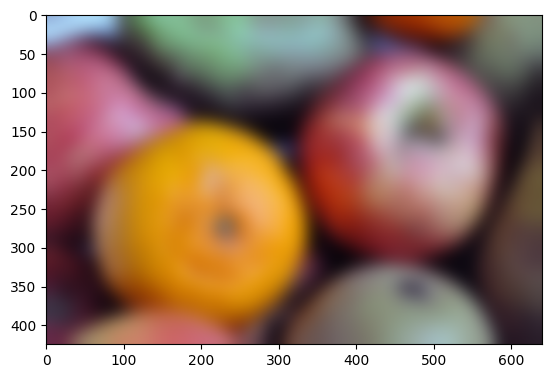

In [ ]:
#denoise the image using Gaussian blur
denoised_image = cv2.GaussianBlur(image_rgb, (71,71),0)
#save the denoted image
cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/DATA engineering /w8/processed files/denoised_image.jpg', denoised_image)
#displayed the denoised image using matplotlib
plt.imshow(denoised_image)
plt.axis()
plt.show()

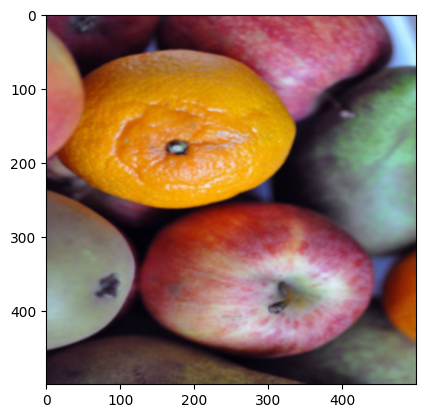

In [ ]:
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_rgb = cv2.resize(image_rgb, (500,500))
image_rgb = cv2.rotate(image_rgb, cv2.ROTATE_90_CLOCKWISE)
image_rgb = cv2.GaussianBlur(image_rgb, (5,5),0)
cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/DATA engineering /w8/processed files/image_rgb.jpg', image_rgb)
plt.imshow(image_rgb)
plt.axis()
plt.show()


In [ ]:
#metadata
metadata = {
    'processed_image.jpg': {
        'keywords' : ['Fruits', 'Healthy food', 'Green'],
        'description': 'A processed fruit image with resizing, rotating, and denoising',
        }
    }

In [ ]:
#save metadata
with open('image_metadata.json', 'w') as json_file:
    json.dump(metadata, json_file, indent=4)

In [ ]:
mean_intensity = np.mean(image_rgb)
norm_intensity = np.linalg.norm(image_rgb)

In [ ]:
#convert to grayscale
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

#apply canny edge detection
edges = cv2.Canny(gray_image, 100,200)

#find contour from the edge detected image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)



In [4]:
import os
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [16]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [8]:
with open('/content/drive/MyDrive/Colab Notebooks/DATA engineering /w8/raw data/101551') as file:
  document_101551 = file.read()

In [10]:
document_sample = document_101551[621:-15]

In [11]:
document_sample_lower = document_sample.lower()

In [17]:
tokens = word_tokenize(document_sample_lower)

In [18]:
token = [word for word in tokens if word not in string.punctuation]

In [19]:
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

In [20]:
print('preprocessed Tokens', tokens)

preprocessed Tokens [':', '|', '>', ':', 'active', 'defending', 'saturn', 'lately', 'net', 'would', '|', '>', ':', 'like', 'state', 'full', 'opinion', 'subject', ',', 'rather', 'reply', 'others', "'", '|', '>', ':', 'points', '.', '|', '>', ':', '|', '>', ':', 'biggest', 'problem', 'people', 'seem', 'saturn', '|', '>', ':', 'dealers', 'make', '~', '$', '2k', 'car', '.', 'think', 'agree', 'car', '|', '>', ':', 'comparably', 'priced', 'competitors', ',', ',', "n't", 'overpriced', '|', '>', ':', 'compared', 'cars', 'class', '.', "n't", 'understand', 'point', '|', '>', ':', 'arguing', 'whether', 'dealer', 'makes', '$', '2k', '?', '|', '>', '|', '>', 'never', 'understood', 'big', 'deal', 'dealer', 'profits', 'either', '.', '|', '>', 'thing', 'figure', 'people', 'believe', '|', '>', 'minimize', 'dealer', 'profit', 'minimize', 'total', 'out-of-pocket', '|', '>', 'expenses', 'car', '.', 'may', 'true', 'cases', ',', '|', '>', 'believe', 'generally', 'true', '.', 'bought', 'saturn', 'sl', 'janua

In [21]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [22]:
stemmed_words = [stemmer.stem(word) for word in tokens]
print('stemmed words:', stemmed_words)

stemmed words: [':', '|', '>', ':', 'activ', 'defend', 'saturn', 'late', 'net', 'would', '|', '>', ':', 'like', 'state', 'full', 'opinion', 'subject', ',', 'rather', 'repli', 'other', "'", '|', '>', ':', 'point', '.', '|', '>', ':', '|', '>', ':', 'biggest', 'problem', 'peopl', 'seem', 'saturn', '|', '>', ':', 'dealer', 'make', '~', '$', '2k', 'car', '.', 'think', 'agre', 'car', '|', '>', ':', 'compar', 'price', 'competitor', ',', ',', "n't", 'overpr', '|', '>', ':', 'compar', 'car', 'class', '.', "n't", 'understand', 'point', '|', '>', ':', 'argu', 'whether', 'dealer', 'make', '$', '2k', '?', '|', '>', '|', '>', 'never', 'understood', 'big', 'deal', 'dealer', 'profit', 'either', '.', '|', '>', 'thing', 'figur', 'peopl', 'believ', '|', '>', 'minim', 'dealer', 'profit', 'minim', 'total', 'out-of-pocket', '|', '>', 'expens', 'car', '.', 'may', 'true', 'case', ',', '|', '>', 'believ', 'gener', 'true', '.', 'bought', 'saturn', 'sl', 'januari', "'92", '.', '|', '>', 'time', ',', 'base', 'st

In [23]:
lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]
print('lemmatized words:', lemmatized)

NameError: name 'lemmatized' is not defined